<a href="https://colab.research.google.com/github/Shanks1234567/Digital_Image_processing/blob/main/Assignment1_438.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q --upgrade opencv-python-headless scikit-image pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 57.6 MB/s eta 0:00:00


Important Libaries

In [ ]:
!pip install -q matplotlib



# Install OpenCV if not available (Colab usually has it)
#!pip install opencv-python-headless

import cv2
import numpy as np
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow  # display OpenCV images
from IPython.display import HTML
from base64 import b64encode
import requests
from IPython.display import HTML


Load and Display Video from URL

In [ ]:


# Step 1: Download video from GitHub (raw URL)
video_url = 'https://raw.githubusercontent.com/Shanks1234567/Digital_Image_processing/main/3695950-hd_1920_1080_24fps.mp4'


# Download video
r = requests.get(video_url)
with open('video.mp4', 'wb') as f:
    f.write(r.content)

# Step 2: Display the video using HTML5 in notebook
video_data = open('video.mp4', "rb").read()
video_b64 = b64encode(video_data).decode()

HTML(f"""
<video width="1000" height="500" controls>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
</video>
""")


Simulated Real-Time Edge Detection (Frame-by-Frame)

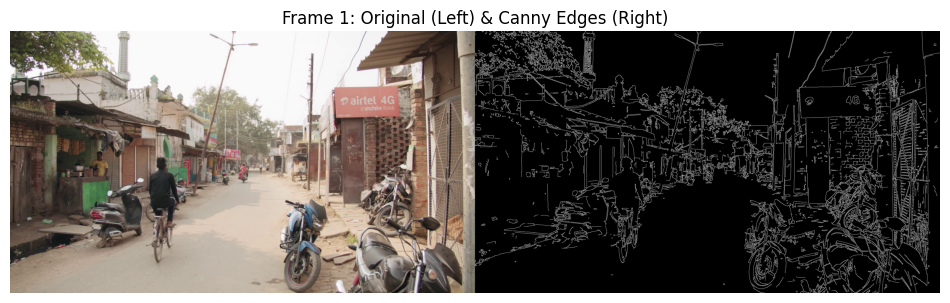

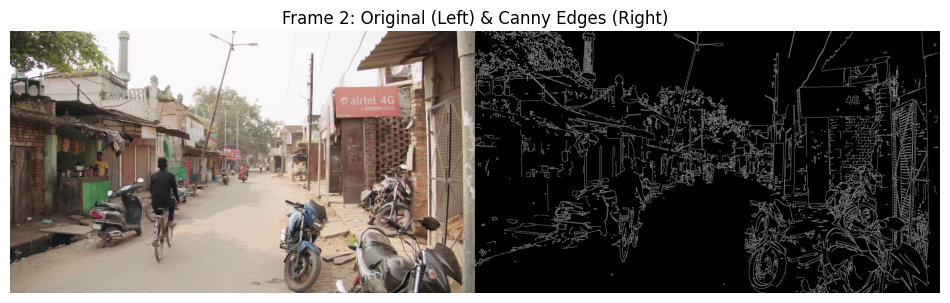

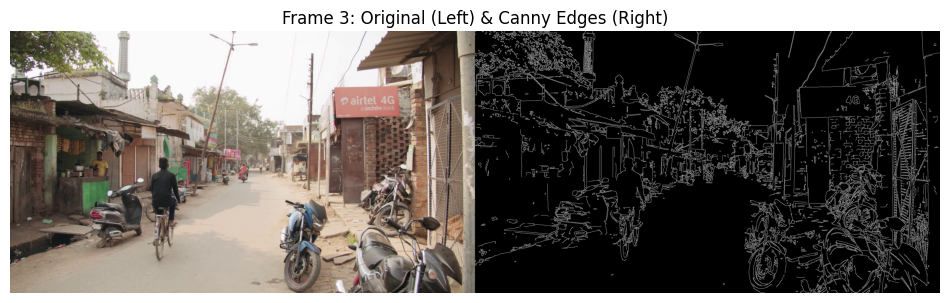

Done! Video saved as output_original_edges.avi


In [ ]:
video_path = 'video.mp4'  # Ensure you've uploaded this file
cap = cv2.VideoCapture(video_path)
# Open video
cap = cv2.VideoCapture(video_path)

fps_in = cap.get(cv2.CAP_PROP_FPS)
fps = max(32, fps_in)

# Prepare video writer for combined frame (original + edges)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out_width = width * 2  # side by side, double width
out_height = height

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_original_edges.avi', fourcc, fps, (out_width, out_height))

frame_count = 0
max_frames = 3  # limit to 3 frames to avoid too many images in Colab

while True:
    ret, frame = cap.read()
    if not ret or frame_count >= max_frames:
        break

    # Resize for speed & display (optional)
    frame_resized = cv2.resize(frame, (width, height))

    # Original frame
    original = frame_resized

    # Canny edges
    gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Combine side-by-side
    combined = np.hstack((original, edges_bgr))

    # Write combined frame to output video
    out.write(combined)

    # Convert BGR to RGB for matplotlib
    combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

    # Display as an image (no clearing)
    plt.figure(figsize=(12, 6))
    plt.imshow(combined_rgb)
    plt.axis('off')
    plt.title(f'Frame {frame_count+1}: Original (Left) & Canny Edges (Right)')
    plt.show()

    frame_count += 1

cap.release()
out.release()

print("Done! Video saved as output_original_edges.avi")


Edge Detection

In [ ]:


# STEP 1: Load the video (already uploaded to Colab)
video_path = 'video.mp4'  # Ensure you've uploaded this file
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = max(32, cap.get(cv2.CAP_PROP_FPS))

# STEP 2: Prepare to save the Canny edge video (grayscale)
avi_output_path = 'canny_output.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(avi_output_path, fourcc, fps, (width, height), isColor=False)

print("Processing video frames with Canny edge detection...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)

    # Write edge-detected frame
    out.write(edges)

cap.release()
out.release()

print("Edge-detected video saved as:", avi_output_path)

# STEP 3: Convert AVI to MP4 for inline display
!ffmpeg -y -i canny_output.avi -vcodec libx264 canny_output.mp4

# STEP 4: Display the Canny edge video inline in Colab
with open("canny_output.mp4", "rb") as f:
    video_data = f.read()

video_b64 = b64encode(video_data).decode()

HTML(f"""
<video width="800" controls autoplay loop>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")


Original Vs Canny Edge Video(side by side)

In [ ]:


# STEP 1: Load your uploaded video
video_path = 'video.mp4'  # Make sure you've uploaded this video

# Open the video
cap = cv2.VideoCapture(video_path)

# Video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps_in = cap.get(cv2.CAP_PROP_FPS)
fps = max(32, fps_in)

# Output side-by-side video (double width)
out_width = width * 2
out_height = height

fourcc = cv2.VideoWriter_fourcc(*'XVID')
avi_output = 'side_by_side_edges.avi'
out = cv2.VideoWriter(avi_output, fourcc, fps, (out_width, out_height))

print("Processing video and creating side-by-side view...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # convert to 3-channel for stacking

    # Combine original and edge side by side
    combined = np.hstack((frame, edges_bgr))

    # Write combined frame
    out.write(combined)

cap.release()
out.release()
print("Side-by-side video saved as:", avi_output)

# STEP 2: Convert .avi to .mp4 for smooth HTML5 playback
!ffmpeg -y -i side_by_side_edges.avi -vcodec libx264 side_by_side_edges.mp4

# STEP 3: Display the .mp4 video inline in Colab
mp4_path = 'side_by_side_edges.mp4'
with open(mp4_path, 'rb') as f:
    mp4_data = f.read()

video_b64 = b64encode(mp4_data).decode()

HTML(f"""
<video width="800" height="auto" controls autoplay loop>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
  Your browser does not support HTML5 video.
</video>
""")


Process Luminance channel

In [ ]:
import cv2
import numpy as np
from base64 import b64encode
from IPython.display import HTML

# Step 1: Load video
video_path = 'video.mp4'  # Ensure it's uploaded in Colab
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = max(32, cap.get(cv2.CAP_PROP_FPS))  # Force ≥ 32 if needed

# Step 2: Prepare output writer
output_path = 'luminance_equalized.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

print("Processing video using Y (luminance) channel...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to YCrCb color space
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)

    # Split the channels
    y, cr, cb = cv2.split(ycrcb)

    # Equalize only the Y channel (luminance)
    y_eq = cv2.equalizeHist(y)

    # Merge equalized Y with original Cr and Cb
    ycrcb_eq = cv2.merge((y_eq, cr, cb))

    # Convert back to BGR for display/saving
    result = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    # Save the processed frame
    out.write(result)

cap.release()
out.release()
print(" Saved luminance-equalized video:", output_path)

# Step 3: Convert to MP4 for browser playback
!ffmpeg -y -i luminance_equalized.avi -vcodec libx264 luminance_equalized.mp4

# Step 4: Display video inline in Colab
with open("luminance_equalized.mp4", "rb") as f:
    video_data = f.read()

video_b64 = b64encode(video_data).decode()

HTML(f"""
<video width="800" controls autoplay loop>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")


Histogram

Computing RGB histogram for original video...


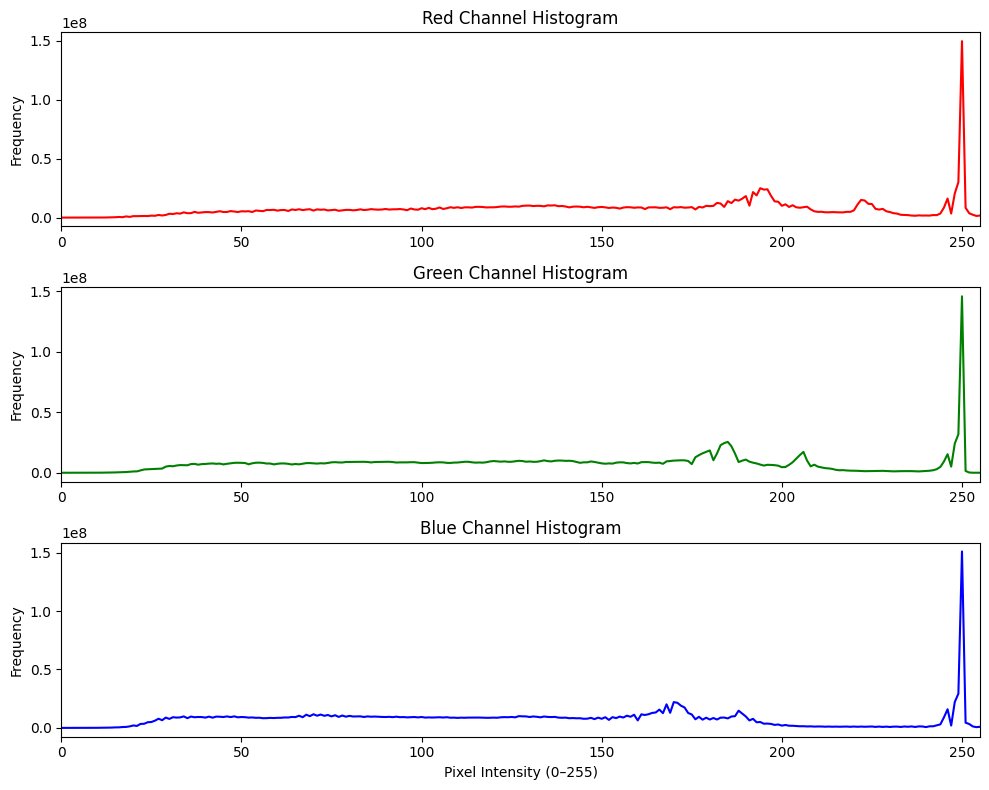

In [ ]:


# Step 1: Open uploaded video
video_path = 'video.mp4'  # Ensure this file is uploaded to Colab
cap = cv2.VideoCapture(video_path)

# Initialize empty histograms for 256 intensity levels
hist_r = np.zeros(256, dtype=np.int64)
hist_g = np.zeros(256, dtype=np.int64)
hist_b = np.zeros(256, dtype=np.int64)

print("Computing RGB histogram for original video...")

# Step 2: Process each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Split into B, G, R channels
    b, g, r = cv2.split(frame)

    # Compute histograms and accumulate
    hist_b += cv2.calcHist([b], [0], None, [256], [0, 256]).flatten().astype(np.int64)
    hist_g += cv2.calcHist([g], [0], None, [256], [0, 256]).flatten().astype(np.int64)
    hist_r += cv2.calcHist([r], [0], None, [256], [0, 256]).flatten().astype(np.int64)

cap.release()

# Step 3: Plot RGB histograms in separate subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(hist_r, color='red')
axs[0].set_title("Red Channel Histogram")
axs[0].set_xlim([0, 255])
axs[0].set_ylabel("Frequency")

axs[1].plot(hist_g, color='green')
axs[1].set_title("Green Channel Histogram")
axs[1].set_xlim([0, 255])
axs[1].set_ylabel("Frequency")

axs[2].plot(hist_b, color='blue')
axs[2].set_title("Blue Channel Histogram")
axs[2].set_xlim([0, 255])
axs[2].set_xlabel("Pixel Intensity (0–255)")
axs[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Processing video with luminance histogram equalization and computing RGB histogram...


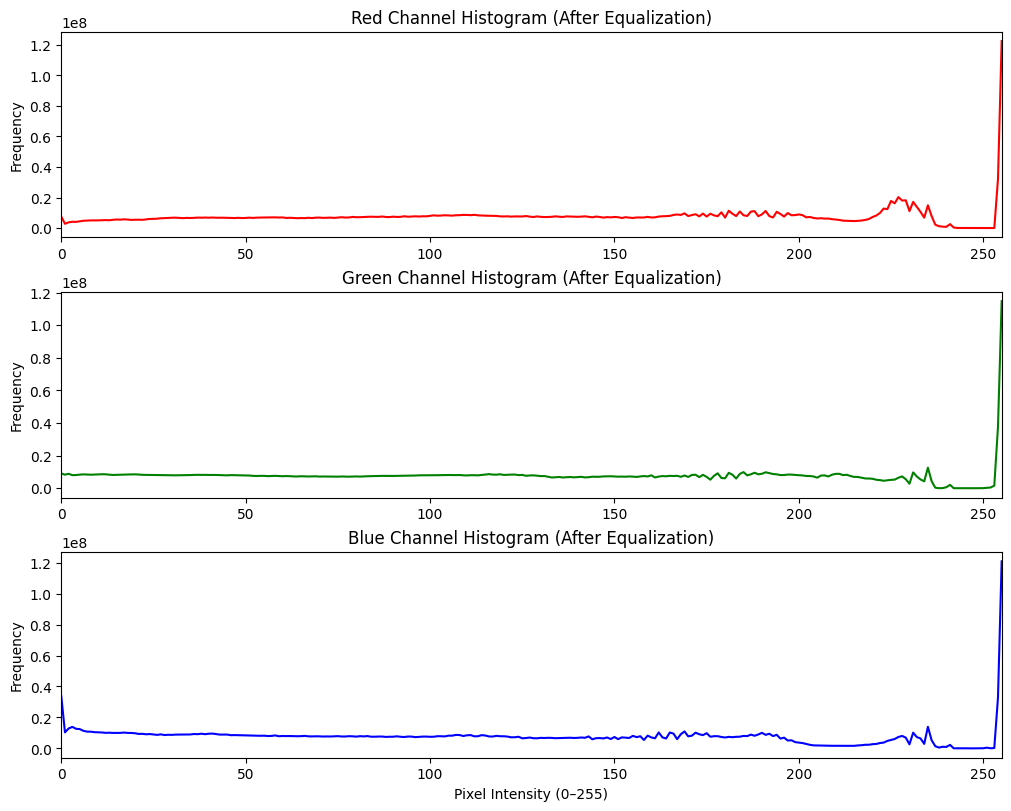

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Open uploaded video
video_path = 'video.mp4'  # Ensure this file is uploaded to Colab
cap = cv2.VideoCapture(video_path)

# Initialize RGB histograms
hist_r_eq = np.zeros(256, dtype=np.int64)
hist_g_eq = np.zeros(256, dtype=np.int64)
hist_b_eq = np.zeros(256, dtype=np.int64)

print("Processing video with luminance histogram equalization and computing RGB histogram...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 2: Convert to YCrCb and equalize only the Y (luminance) channel
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y_eq = cv2.equalizeHist(y)
    ycrcb_eq = cv2.merge((y_eq, cr, cb))
    result = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    # Step 3: Split equalized frame into BGR channels
    b_eq, g_eq, r_eq = cv2.split(result)

    # Step 4: Accumulate histograms
    hist_b_eq += cv2.calcHist([b_eq], [0], None, [256], [0, 256]).flatten().astype(np.int64)
    hist_g_eq += cv2.calcHist([g_eq], [0], None, [256], [0, 256]).flatten().astype(np.int64)
    hist_r_eq += cv2.calcHist([r_eq], [0], None, [256], [0, 256]).flatten().astype(np.int64)

cap.release()

# Step 5: Plot RGB histograms after equalization
fig, axs = plt.subplots(3, 1, figsize=(10, 8), constrained_layout=True)

axs[0].plot(hist_r_eq, color='red')
axs[0].set_title("Red Channel Histogram (After Equalization)")
axs[0].set_xlim([0, 255])
axs[0].set_ylabel("Frequency")

axs[1].plot(hist_g_eq, color='green')
axs[1].set_title("Green Channel Histogram (After Equalization)")
axs[1].set_xlim([0, 255])
axs[1].set_ylabel("Frequency")

axs[2].plot(hist_b_eq, color='blue')
axs[2].set_title("Blue Channel Histogram (After Equalization)")
axs[2].set_xlim([0, 255])
axs[2].set_xlabel("Pixel Intensity (0–255)")
axs[2].set_ylabel("Frequency")

plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from base64 import b64encode
from IPython.display import HTML

# Load video
video_path = 'video.mp4'  # change as needed
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError("Cannot open video file")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = max(24, cap.get(cv2.CAP_PROP_FPS))

# Output video size: 2x2 grid
grid_width = width * 2
grid_height = height * 2

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('original_lum_he_hist_grid.avi', fourcc, fps, (grid_width, grid_height))

def plot_rgb_histogram(image):
    fig = Figure(figsize=(4, 3))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=col)
    ax.set_xlim([0, 256])
    ax.axis('off')
    fig.tight_layout()
    canvas.draw()

    width_fig, height_fig = canvas.get_width_height()
    img = np.frombuffer(canvas.buffer_rgba(), dtype=np.uint8).reshape((height_fig, width_fig, 4))
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
    img = cv2.resize(img, (width, height))
    return img

print("Processing video frames...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to YCrCb and equalize luminance channel
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y_eq = cv2.equalizeHist(y)
    ycrcb_eq = cv2.merge((y_eq, cr, cb))
    lum_he_frame = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    # Generate histograms for original and luminance HE frames
    orig_hist_img = plot_rgb_histogram(frame)
    he_hist_img = plot_rgb_histogram(lum_he_frame)

    # Compose grid
    top_row = np.hstack((frame, lum_he_frame))
    bottom_row = np.hstack((orig_hist_img, he_hist_img))
    grid_frame = np.vstack((top_row, bottom_row))

    out.write(grid_frame)

cap.release()
out.release()

print("Saved video as 'original_lum_he_hist_grid.avi'")

# Convert AVI to MP4 for browser playback (requires ffmpeg)
import os
os.system('ffmpeg -y -i original_lum_he_hist_grid.avi -vcodec libx264 original_lum_he_hist_grid.mp4')

# Display video inline
with open("original_lum_he_hist_grid.mp4", "rb") as f:
    video_bytes = f.read()
video_b64 = b64encode(video_bytes).decode()

HTML(f"""
<video width="960" controls autoplay loop>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
</video>
""")


 HE VS CLAHE (Compare with RMS contrast)

In [ ]:

# Load your video
cap = cv2.VideoCapture('video.mp4')
if not cap.isOpened():
    raise IOError("Cannot open video file")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = max(24, cap.get(cv2.CAP_PROP_FPS))

# Output size for 2x2 grid (2 columns, 2 rows)
grid_width = width * 2
grid_height = height * 2

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('he_clahe_hist_grid.avi', fourcc, fps, (grid_width, grid_height))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

def rms_contrast(img):
    return np.sqrt(np.mean((img - np.mean(img)) ** 2))

def plot_rgb_histogram(image, hist_max=None):
    fig = Figure(figsize=(4, 3))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=col)
    ax.set_xlim([0, 256])
    if hist_max is not None:
        ax.set_ylim([0, hist_max])
    ax.axis('off')
    fig.tight_layout()
    canvas.draw()

    width_fig, height_fig = canvas.get_width_height()
    img = np.frombuffer(canvas.buffer_rgba(), dtype=np.uint8)
    img = img.reshape((height_fig, width_fig, 4))  # RGBA image

    # Convert RGBA to BGR (for OpenCV)
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)

    # Resize histogram plot to match frame size
    img = cv2.resize(img, (width, height))

    return img

def label_img(img, text):
    img_copy = img.copy()
    return cv2.putText(img_copy, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                       0.8, (255, 255, 255), 2)

# Pre-calculate histogram max for uniform y-axis scale
hist_max = 0
temp_cap = cv2.VideoCapture('video.mp4')
for _ in range(30):
    ret, f = temp_cap.read()
    if not ret:
        break
    for ch in range(3):
        hist = cv2.calcHist([f], [ch], None, [256], [0,256])
        hist_max = max(hist_max, hist.max())
temp_cap.release()

print("Processing video frames...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    b, g, r = cv2.split(frame)

    # HE
    r_he = cv2.equalizeHist(r)
    g_he = cv2.equalizeHist(g)
    b_he = cv2.equalizeHist(b)
    he_img = cv2.merge((b_he, g_he, r_he))

    # CLAHE
    r_clahe = clahe.apply(r)
    g_clahe = clahe.apply(g)
    b_clahe = clahe.apply(b)
    clahe_img = cv2.merge((b_clahe, g_clahe, r_clahe))

    # RMS contrast
    rms_he = np.mean([rms_contrast(ch) for ch in [r_he, g_he, b_he]])
    rms_clahe = np.mean([rms_contrast(ch) for ch in [r_clahe, g_clahe, b_clahe]])

    # Label images
    he_labeled = label_img(he_img, f"HE RMS: {rms_he:.2f}")
    clahe_labeled = label_img(clahe_img, f"CLAHE RMS: {rms_clahe:.2f}")

    # Histograms
    he_hist_img = plot_rgb_histogram(he_img, hist_max)
    clahe_hist_img = plot_rgb_histogram(clahe_img, hist_max)

    # 2x2 Grid
    top_row = np.hstack((he_labeled, clahe_labeled))
    bottom_row = np.hstack((he_hist_img, clahe_hist_img))
    grid_frame = np.vstack((top_row, bottom_row))

    out.write(grid_frame)

cap.release()
out.release()

print("✅ Saved video as 'he_clahe_hist_grid.avi'")

# Convert AVI to MP4
!ffmpeg -y -i he_clahe_hist_grid.avi -vcodec libx264 he_clahe_hist_grid.mp4

# Display in Colab
with open("he_clahe_hist_grid.mp4", "rb") as f:
    video_bytes = f.read()
video_b64 = b64encode(video_bytes).decode()

HTML(f"""
<video width="960" controls autoplay loop>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
</video>
""")


In [ ]:
import cv2
import numpy as np
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from base64 import b64encode
from IPython.display import HTML

# Load your video
video_path = 'video.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError("Cannot open video file")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = max(24, cap.get(cv2.CAP_PROP_FPS))

# Output size for 2x2 grid (2 columns, 2 rows)
grid_width = width * 2
grid_height = height * 2

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('he_clahe_hist_grid.avi', fourcc, fps, (grid_width, grid_height))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

def rms_contrast(img):
    return np.sqrt(np.mean((img - np.mean(img)) ** 2))

def plot_rgb_histogram(image, hist_max=None):
    fig = Figure(figsize=(4, 3))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=col)
    ax.set_xlim([0, 256])
    if hist_max is not None:
        ax.set_ylim([0, hist_max])
    ax.axis('off')
    fig.tight_layout()
    canvas.draw()

    width_fig, height_fig = canvas.get_width_height()
    img = np.frombuffer(canvas.buffer_rgba(), dtype=np.uint8)
    img = img.reshape((height_fig, width_fig, 4))  # RGBA image

    # Convert RGBA to BGR (for OpenCV)
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)

    # Resize histogram plot to match frame size
    img = cv2.resize(img, (width, height))

    return img

def label_img(img, text):
    img_copy = img.copy()
    return cv2.putText(img_copy, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                       0.8, (255, 255, 255), 2)

# Pre-calculate histogram max for uniform y-axis scale
hist_max = 0
temp_cap = cv2.VideoCapture(video_path)
for _ in range(30):
    ret, f = temp_cap.read()
    if not ret:
        break
    for ch in range(3):
        hist = cv2.calcHist([f], [ch], None, [256], [0,256])
        hist_max = max(hist_max, hist.max())
temp_cap.release()

print("Processing video frames...")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to YCrCb color space and extract luminance
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)

    # HE on luminance
    y_he = cv2.equalizeHist(y)
    ycrcb_he = cv2.merge((y_he, cr, cb))
    he_img = cv2.cvtColor(ycrcb_he, cv2.COLOR_YCrCb2BGR)

    # CLAHE on luminance
    y_clahe = clahe.apply(y)
    ycrcb_clahe = cv2.merge((y_clahe, cr, cb))
    clahe_img = cv2.cvtColor(ycrcb_clahe, cv2.COLOR_YCrCb2BGR)

    # RMS contrast using luminance
    rms_he = rms_contrast(y_he)
    rms_clahe = rms_contrast(y_clahe)

    # Label images
    he_labeled = label_img(he_img, f"HE RMS: {rms_he:.2f}")
    clahe_labeled = label_img(clahe_img, f"CLAHE RMS: {rms_clahe:.2f}")

    # Histograms
    he_hist_img = plot_rgb_histogram(he_img, hist_max)
    clahe_hist_img = plot_rgb_histogram(clahe_img, hist_max)

    # 2x2 Grid
    top_row = np.hstack((he_labeled, clahe_labeled))
    bottom_row = np.hstack((he_hist_img, clahe_hist_img))
    grid_frame = np.vstack((top_row, bottom_row))

    out.write(grid_frame)

cap.release()
out.release()
print("✅ Saved video as 'he_clahe_hist_grid.avi'")

# Convert AVI to MP4
!ffmpeg -y -i he_clahe_hist_grid.avi -vcodec libx264 he_clahe_hist_grid.mp4

# Display in Colab
with open("he_clahe_hist_grid.mp4", "rb") as f:
    video_bytes = f.read()
video_b64 = b64encode(video_bytes).decode()

HTML(f"""
<video width="960" controls autoplay loop>
  <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
</video>
""")
